In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
starbucks_df = pd.read_csv('transcript.csv')

In [4]:
starbucks_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [23]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [25]:
starbucks_df['person'].nunique()

17000

In [27]:
starbucks_df['value'].nunique()

5121

In [28]:
starbucks_df.columns.get_loc('value')

3

In [39]:
values_list = []
for i in range(len(starbucks_df)):
    values_list.append("'offer id': " in starbucks_df.iloc[i, 3])

In [40]:
sum(values_list)

134002

In [42]:
no_offer_id = starbucks_df[~starbucks_df['value'].str.contains("'offer id': ")]

In [44]:
len(no_offer_id) + sum(values_list)

306534

In [45]:
no_offer_id.head()

,Unnamed: 0,person,event,value,time
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12658,12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12659,12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0


In [5]:
profile_df = pd.read_csv('profile.csv')

In [6]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


(array([1308., 1438., 2054., 3383., 3257., 2031.,  966.,  361.,   27.,
        2175.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

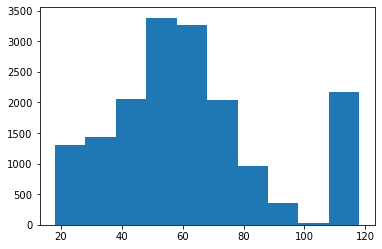

In [8]:
plt.hist(profile_df['age'])

In [9]:
check_missing = profile_df[profile_df['age'] == 118]

In [10]:
check_missing.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


In [11]:
len(check_missing)

2175

In [12]:
check_missing['age'].value_counts()

118    2175
Name: age, dtype: int64

In [13]:
check_missing['income'].value_counts()

Series([], Name: income, dtype: int64)

In [14]:
profile_df = profile_df[profile_df['age']!= 118] 

In [15]:
len(profile_df)

14825

In [16]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14825 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               14825 non-null  int64  
 3   id                14825 non-null  object 
 4   became_member_on  14825 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 810.7+ KB


In [17]:
profile_df.describe()

,Unnamed: 0,age,became_member_on,income
count,14825.000000,14825.000000,1.482500e+04,14825.000000
mean,8496.961079,54.393524,2.016689e+07,65404.991568
std,4896.261043,17.383705,1.188565e+04,21598.299410
min,1.000000,18.000000,2.013073e+07,30000.000000
25%,4273.000000,42.000000,2.016052e+07,49000.000000
50%,8490.000000,55.000000,2.017080e+07,64000.000000
75%,12733.000000,66.000000,2.017123e+07,80000.000000
max,16999.000000,101.000000,2.018073e+07,120000.000000


In [18]:
portfolio_df = pd.read_csv('portfolio.csv')

In [19]:
portfolio_df.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [20]:
len(portfolio_df)

10

In [22]:
portfolio_df

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [21]:
starbucks_df.sort_values(by = ['person', 'time']).head()

,Unnamed: 0,person,event,value,time
55972,55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
77705,77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
89291,89291,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},228
113605,113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
139992,139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372


In [11]:
completed_offers = starbucks_df[starbucks_df['event'] == 'offer completed']
completed_offers.head()

,Unnamed: 0,person,event,value,time
12658,12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


In [13]:
completed_offers.sort_values(by = 'person').head(50)

,Unnamed: 0,person,event,value,time
228423,228423,0009655768c64bdeb2e877511632db8f,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,528
258884,258884,0009655768c64bdeb2e877511632db8f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,576
168413,168413,0009655768c64bdeb2e877511632db8f,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,414
258981,258981,0011e0d4e6b944f998e987f904e8c1e5,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,576
258980,258980,0011e0d4e6b944f998e987f904e8c1e5,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,576
95422,95422,0011e0d4e6b944f998e987f904e8c1e5,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,252
218936,218936,0020c2b971eb4e9188eac86d93036a77,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,510
218937,218937,0020c2b971eb4e9188eac86d93036a77,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,510
31327,31327,0020c2b971eb4e9188eac86d93036a77,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,54
88010,88010,0020ccbbb6d84e358d3414a3ff76cffd,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,222
